     X1    X2         y
0 -0.41 -0.99  0.566375
1 -0.80 -0.51 -0.427821
2  0.34  0.60 -0.637884
3  0.64 -0.67  0.158604
4  0.18  0.61 -0.969506


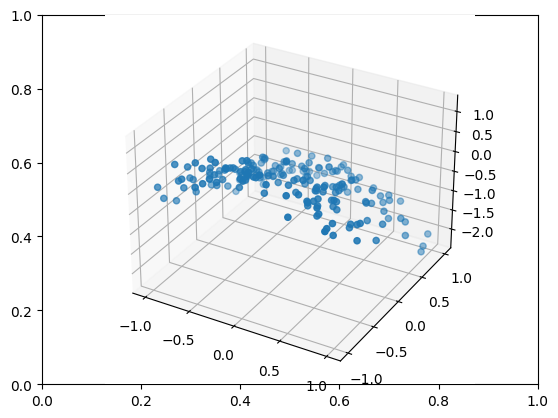

In [391]:
import pandas as pd
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

# read in data
df = pd.read_csv("data.csv")
# check if the data loaded in correctly
print(df.head())

#Store the data in features and target variables
X1 = df.iloc[:,0]
X2 = df.iloc[:,1]
y = df.iloc[:,2]

# Create the plot
fig , ax = plt.subplots()

# Load variables into the 3D scatter plot
ax = plt.axes(projection ="3d")
ax.scatter3D(X1,X2,y,)

In [392]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures



def plot(X1, X2, X_test, y, predictions):
    # Combine X1 and X2
    X = np.column_stack((X1, X2))

    # Create a grid for generating predictions
    grid_size = 100
    grid = np.linspace(-5, 5, grid_size)


    # Training data:
    fig = plt.figure(figsize=(10, 8))

    # First plot
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(X1, X2, y, c='red', label = 'Training Data')
    #vmin=-5, vmax=5, color='#0000ff80'
    ax1.plot_trisurf(X_test[:,0], X_test[:,1], predictions, vmin=-100, vmax=100, color='#0000ff80',label = 'Predictions on Test Data')
    ax1.zaxis.set_rotate_label(False)
    ax1.set_xlabel('$x_1$')
    ax1.set_ylabel('$x_2$')
    ax1.set_zlabel('target', rotation=0)
    ax1.view_init(elev=20, azim=30)  # Set the view angle for the first plot
    #ax1.legend()

    # Second plot
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.scatter(X1, X2, y, c='red', label = 'Training Data')
    ax2.plot_trisurf(X_test[:,0], X_test[:,1], predictions, vmin=-100, vmax=100, color='#0000ff80',label = 'Predictions on Test Data')
    #ax2.plot_trisurf(X1, X2, predictions, vmin=-5, vmax=5, color='#0000ff80')
    ax2.zaxis.set_rotate_label(False)
    
    ax2.set_xlabel('$x_1$')
    ax2.set_ylabel('$x_2$')
    ax2.set_zlabel('target', rotation=0)
    ax2.view_init(elev=20, azim=-90)  # Set a different view angle for the second plot
    
    proxy_artists = [plt.Line2D([0], [0], linestyle="none", marker='o', markersize=10, color='red'),
                 plt.Line2D([0], [0], linestyle="-", color='#0000ff80')]

    # Add legend to the plots
    ax1.legend(proxy_artists, ['Training Data', 'Predictions'])
    ax2.legend(proxy_artists, ['Training Data', 'Predictions'])

    


# Creates a new variable with polynomial features of X
def polynomials(degree,X):
 poly = PolynomialFeatures(degree=degree)
 X_poly = poly.fit_transform(X)
 return X_poly

def Create_Test():
 grid = np.linspace(-3,3) #-5,5
 X_test = []
 for i in grid:
  for j in grid:
    X_test.append([i, j])
 X_test = np.array(X_test)
 X_test_poly = polynomials(5,X_test)
 return X_test, X_test_poly
  
# Trains lasso models with different values for C, calls previous two functions
# Prints paramater values and plots results vs training data
def train_lasso(X1,X2,y):
    #Create variables
    X = np.column_stack((X1,X2))
    X_poly = polynomials(5,X)
    X_test, X_test_poly = Create_Test()

    #range of regularisation terms to be tested
    test_values = [0.001, 0.01,1, 10, 100, 1000,10000]
    
    print("Lasso Result:\n")
    #Loop through each test value creating a new model for each
    for C in test_values:
     #Fit the model to X and Y and set regularisation term
     model = Lasso(alpha=1/(2*C))
     model.fit(X_poly,y)
     predictions = model.predict(X_test_poly)

     #Store the paramaters the intercept
     print(f"Paramaters for alpha = {C}",)
     print(list(model.coef_))
     print(f"Intercept = {model.intercept_}\n")
     
     print(f"Plot for C = {C}")
     plot(X1,X2,X_test,y,predictions)
    
     plt.show()

#Does the same as the lasso function except uses the Ridge regression model
def train_ridge(X1,X2,y):
 #Create variables
 X = np.column_stack((X1,X2))
 X_poly = polynomials(5,X)
 X_test, X_test_poly = Create_Test()

 #range of regularisation terms to be tested
 test_values = [0.00001,0.0001,.001,.01,.1,1,10,100]

 #Loop through each test value creating a new model for each
 print("Ridge results:\n")
 for C in test_values:
    #Fit the model to X and Y and set regularisation term
    model = Ridge(alpha=(1/(C*2)))
    model.fit(X_poly,y)
    predictions = model.predict(X_test_poly)

    #Store the paramaters the intercept
    print(f"Paramaters for alpha = {C}",)
    #print(list(model.coef_))

    coefficients = list(model.coef_)
    rounded_coefficients = [round(coef, 3) for coef in coefficients]
    print(rounded_coefficients)
    print(f"Intercept = {model.intercept_}\n")

    print(f"Plot for C = {C}")
    plot(X1,X2,X_test,y,predictions)
     

Ridge results:

Paramaters for alpha = 1e-05
[0.0, 0.0, -0.001, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.001, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.001]
Intercept = -0.3109464507894657

Plot for C = 1e-05
Paramaters for alpha = 0.0001
[0.0, 0.0, -0.013, -0.003, 0.0, 0.0, 0.0, -0.004, -0.0, -0.008, -0.003, -0.0, -0.001, 0.0, 0.0, -0.0, -0.003, -0.0, -0.003, -0.0, -0.006]
Intercept = -0.3097696340727821

Plot for C = 0.0001
Paramaters for alpha = 0.001
[0.0, 0.004, -0.111, -0.03, 0.002, -0.0, 0.0, -0.035, -0.004, -0.066, -0.027, -0.003, -0.012, 0.001, 0.002, -0.002, -0.022, -0.003, -0.021, -0.004, -0.047]
Intercept = -0.29807956625023296

Plot for C = 0.001
Paramaters for alpha = 0.01
[0.0, 0.023, -0.434, -0.196, -0.001, -0.006, 0.006, -0.118, -0.023, -0.227, -0.172, -0.024, -0.075, -0.001, 0.004, -0.006, -0.067, -0.016, -0.059, -0.022, -0.148]
Intercept = -0.21604839979235846

Plot for C = 0.01
Paramaters for alpha = 0.1
[0.0, 0.035, -0.751, -0.462, 0.004, -0.02, 0.02,

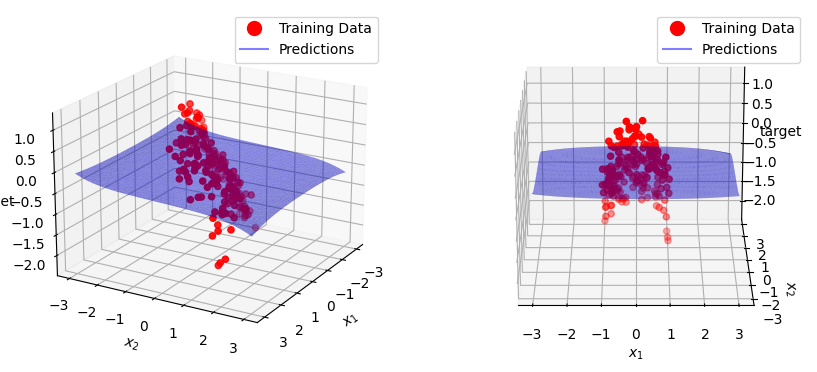

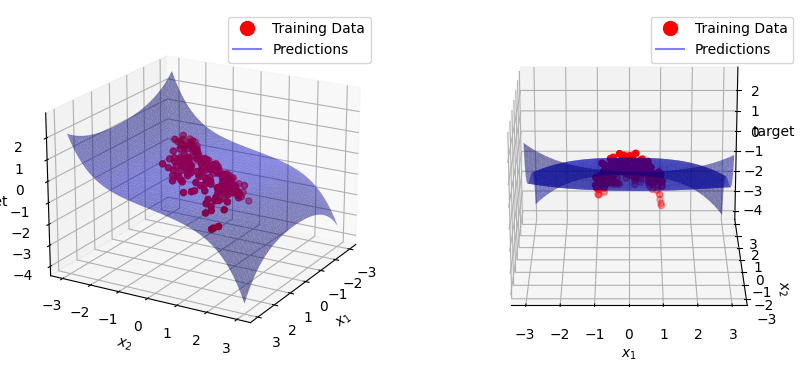

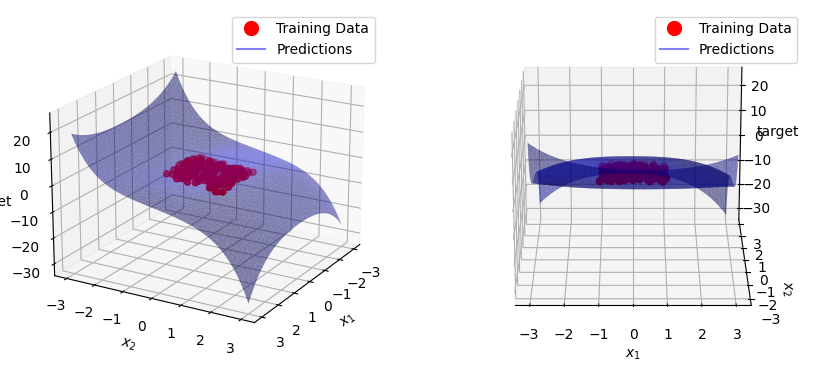

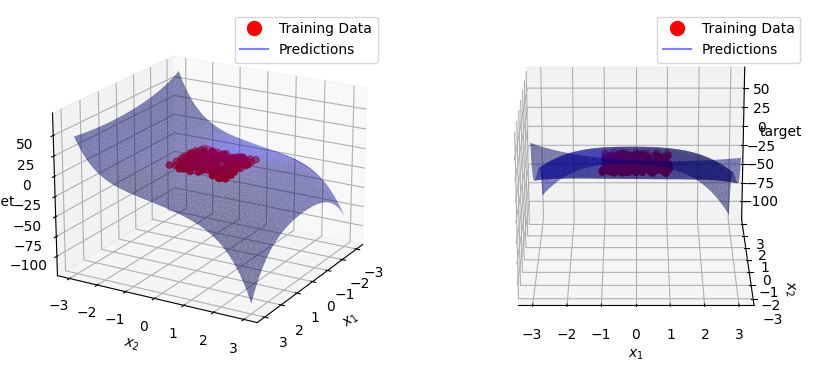

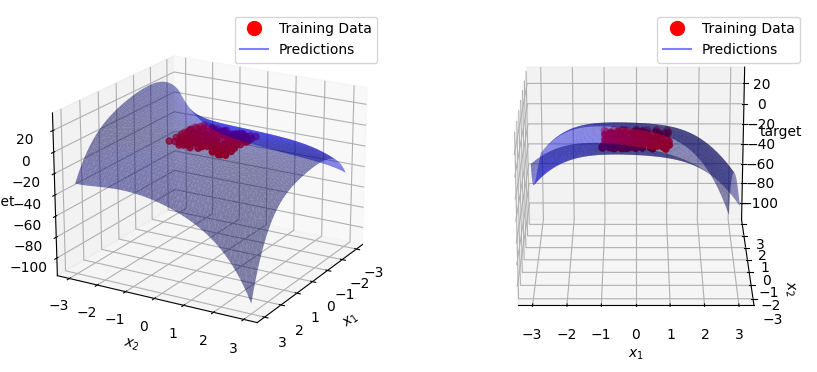

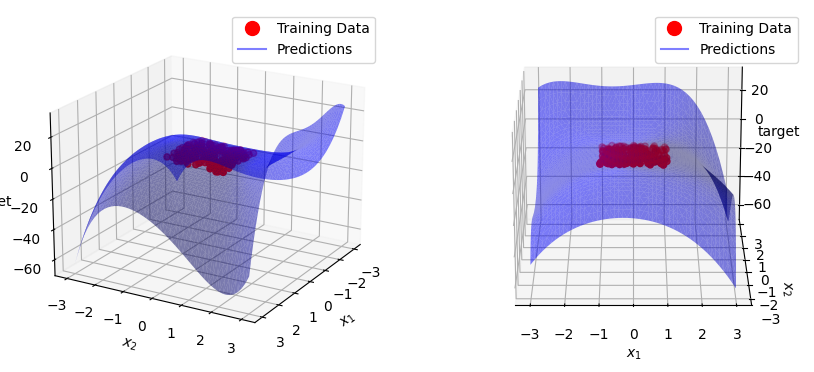

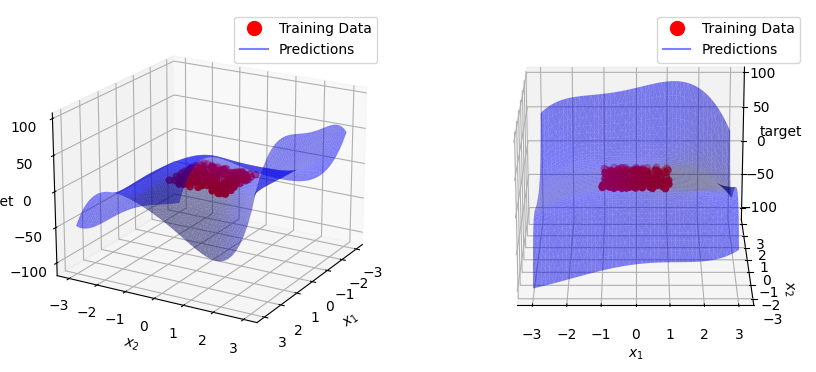

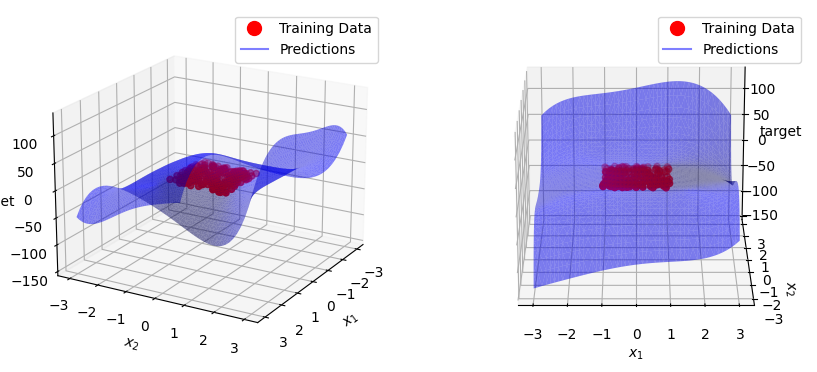

In [393]:
train_lasso(X1,X2,y)
train_ridge(X1,X2,y)

In [424]:
# - Cross Validation to decide hyperparamater C
# Uses 5 fold CV to plot C vs error bar.
# Plot mean and standard deviation of prediction error vs C

from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error

#Ridge regression version
def test_for_C_R(X1,X2,y):
 #Create variables
 X = np.column_stack((X1,X2))
 mean_error = []
 std_error = []
 X_poly = polynomials(5,X)
 X_test, X_test_poly = Create_Test()

 #Range of paramaters to be tested
 parameters = [0.00001,0.0001,.001,.01,.1,1,10,100,1000]

 #Loop through testing models
 for C in parameters:
  model = Ridge(alpha=(1/(2*C)))
  temp = []
  kf = KFold(n_splits=5)
  for train, test in kf.split(X_poly):
    model.fit(X_poly[train], y[train])
    ypred = model.predict(X_poly[test])
    temp.append(mean_squared_error(y[test], ypred))
  mean_error.append(np.array(temp).mean())
  std_error.append(np.array(temp).std())

 plt.errorbar(parameters, mean_error, yerr=std_error, fmt='o-', color='b', ecolor='lightgray', elinewidth=3, capsize=0)
 plt.xlabel('C')
 plt.ylabel('Mean square error')
 plt.xscale('log')
 plt.title('Mean and Standard Deviation of Prediction Error vs C')
 plt.show()

#Lasso regression version
def test_for_C_L(X1,X2,y):
 X = np.column_stack((X1,X2))

 mean_error = []
 std_error = []
 X_poly = polynomials(5,X)
 X_test, X_test_poly = Create_Test()

 mean_error = []
 std_error = []
 parameters = [0.1, 1, 10, 100, 1000, 10000,100000]
 for C in parameters:
  model = Lasso(alpha=(1/(2*C)))
  temp = []
  kf = KFold(n_splits=5)
  for train, test in kf.split(X_poly):
    model.fit(X_poly[train], y[train])
    ypred = model.predict(X_poly[test])
    temp.append(mean_squared_error(y[test], ypred))
  mean_error.append(np.array(temp).mean())
  std_error.append(np.array(temp).std())

 plt.errorbar(parameters, mean_error, yerr=std_error, fmt='o-', color='b', ecolor='lightgray', elinewidth=3, capsize=0)
 plt.xlabel('C')
 plt.ylabel('Mean square error')
 plt.xscale('log')
 plt.title('Mean and Standard Deviation of Prediction Error vs C')
 plt.show()

Error Bar for Lasso Regression:



c:\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.529e-03, tolerance: 7.945e-03
  model = cd_fast.enet_coordinate_descent(


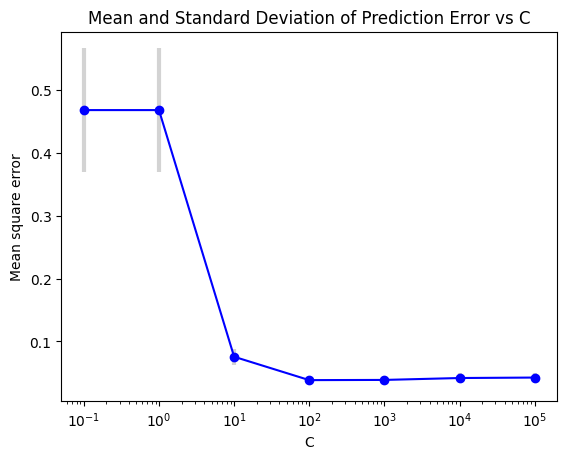

Error Bar for Ridge Regression:



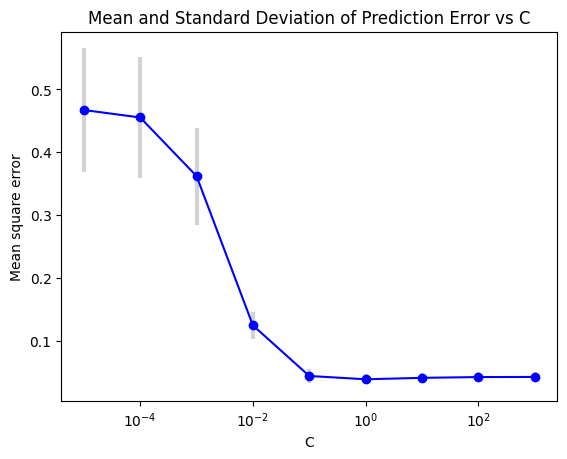

In [425]:
#Call functions
print("Error Bar for Lasso Regression:\n")
test_for_C_L(X1,X2,y)
print("Error Bar for Ridge Regression:\n")
test_for_C_R(X1,X2,y)